In [1]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Exercice 1 : Régression Logistique avec Keras

In [2]:

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


In [4]:
model = Sequential()# 1 couche complétement connecté 

model.add(Dense(10,  input_dim=784))

#suivie d'une cuoche d'activation softmax
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
#pas de gradient 
learning_rate=0.1
sgd=SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [7]:
batch_size = 100
nb_epoch = 20
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 0.7840 - accuracy: 0.8055
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.9002
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.9059
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.9080
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.3043 - accuracy: 0.9141
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2994 - accuracy: 0.9154
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.9185
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2925 - accuracy: 0.9184
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2862 - accuracy: 0.9212
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.9207

In [8]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 27.08%
accuracy: 92.31%


# Exercice 2 : Perceptron avec Keras

In [12]:
model2 = Sequential()

model2.add(Dense(100,  input_dim=784, name='fc1'))
model2.add(Activation('sigmoid'))
#couche de sorti 
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               78500     
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
learning_rate=1
sgd=SGD(learning_rate)
model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])


#nombre d’exemples utilisé pour estimer le gradient de la fonction de coût.
batch_size = 100


#passages sur l’ensemble des exemples de la base d’apprentissage) lors de la descente de gradient.
nb_epoch = 100

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model2.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/100
600/600 [==============================] - 2s 3ms/step - loss: 0.6732 - accuracy: 0.7992
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2160 - accuracy: 0.9349
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1560 - accuracy: 0.9541
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1206 - accuracy: 0.9649
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1024 - accuracy: 0.9702
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0872 - accuracy: 0.9752
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0746 - accuracy: 0.9787
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0656 - accuracy: 0.9817
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0580 - accuracy: 0.9837
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.0532 - accura

In [21]:
scores = model2.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model2.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

loss: 7.89%
accuracy: 97.97%


In [22]:
from keras.models import model_from_yaml
def saveModel(model, savename):
  # serialize model to YAML
  model_yaml = model.to_yaml()
  with open(savename+".yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
    print("Yaml Model ",savename,".yaml saved to disk")
  # serialize weights to HDF5
  model.save_weights(savename+".h5")
  print("Weights ",savename,".h5 saved to disk")

In [23]:
saveModel(model2,'model2')

Yaml Model  model2 .yaml saved to disk
Weights  model2 .h5 saved to disk


# Exercice 3 : Réseaux de neurones convolutifs avec Keras

In [26]:
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D


conv1 = Conv2D(16,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid')
pool1 = MaxPooling2D(pool_size=(2, 2))
conv2 = Conv2D(32,kernel_size=(5, 5),activation='relu',padding='valid')
pool2 = MaxPooling2D(pool_size=(2, 2))


model3=Sequential()
model3.add(conv1)
model3.add(pool1)
model3.add(conv2)
model3.add(pool2)
model3.add(Flatten())

In [31]:
model3.add(Dense(100))

model3.add(Activation('sigmoid'))
#couche de sorti 
model3.add(Dense(10,  input_dim=100))
model3.add(Activation('softmax'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               51300     
_________________________________________________________________
activation_9 (Activation)    (None, 100)              

In [32]:
learning_rate=0.1

sgd=SGD(learning_rate)

model3.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

#nombre d’exemples utilisé pour estimer le gradient de la fonction de coût.
batch_size = 100


#passages sur l’ensemble des exemples de la base d’apprentissage) lors de la descente de gradient.
nb_epoch = 10

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

model3.fit(x_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)


Epoch 1/10
600/600 [==============================] - 33s 54ms/step - loss: 1.0372 - accuracy: 0.6822
Epoch 2/10
600/600 [==============================] - 30s 50ms/step - loss: 0.1423 - accuracy: 0.9584
Epoch 3/10
600/600 [==============================] - 31s 52ms/step - loss: 0.0953 - accuracy: 0.9729
Epoch 4/10
600/600 [==============================] - 33s 54ms/step - loss: 0.0756 - accuracy: 0.9784
Epoch 5/10
600/600 [==============================] - 32s 53ms/step - loss: 0.0588 - accuracy: 0.9845
Epoch 6/10
600/600 [==============================] - 32s 53ms/step - loss: 0.0531 - accuracy: 0.9846
Epoch 7/10
600/600 [==============================] - 31s 52ms/step - loss: 0.0448 - accuracy: 0.9877
Epoch 8/10
600/600 [==============================] - 31s 52ms/step - loss: 0.0406 - accuracy: 0.9891
Epoch 9/10
600/600 [==============================] - 32s 54ms/step - loss: 0.0358 - accuracy: 0.9908
Epoch 10/10
600/600 [==============================] - 32s 54ms/step - loss: 0.033

In [33]:
scores = model3.evaluate(x_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model3.metrics_names[0], scores[0]*100)) #fonction cout 
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))   # score sur des données de 

loss: 3.90%
accuracy: 98.76%


In [34]:
saveModel(model3,'model3')

Yaml Model  model3 .yaml saved to disk
Weights  model3 .h5 saved to disk


# Exercice 4 : Visualisation avec t-SNE

In [37]:
import matplotlib 
matplotlib.use('TKAgg')
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.mixture import GaussianMixture
from scipy import linalg
from sklearn.neighbors import NearestNeighbors

from sklearn.manifold import TSNE


In [38]:
tsn =TSNE(init='pca',perplexity=30,verbose=2)

In [39]:
Xre=tsn.fit_transform(X_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.141s...
[t-SNE] Computed neighbors for 10000 samples in 192.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030838
[t-SNE] Computed conditional probabilities in 0.591s
[t-SNE] Iteration 50: error = 84.7065430, gradient norm = 0.0045486 (50 iterations in 5.154s)
[t-SNE] 

In [51]:
def convexHulls(points, labels):
  # computing convex hulls for a set of points with asscoiated labels
  convex_hulls = []
  for i in range(10):
    convex_hulls.append(ConvexHull(points[labels==i,:]))
  return convex_hulls
# Function Call
convex_hulls= convexHulls(Xre, y_test)
convex_hulls

In [52]:
def best_ellipses(points, labels):
  # computing best fiiting ellipse for a set of points with asscoiated labels
  gaussians = []
  for i in range(10):
    gaussians.append(GaussianMixture(n_components=1, covariance_type='full').fit(points[labels==i, :]))
  return gaussians
# Function Call
ellipses = best_ellipses(Xre, y_test)

In [54]:
def neighboring_hit(points, labels):
  k = 6
  nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(points)
  distances, indices = nbrs.kneighbors(points)

  txs = 0.0
  txsc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  nppts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

  for i in range(len(points)):
    tx = 0.0
    for j in range(1,k+1):
      if (labels[indices[i,j]]== labels[i]):
        tx += 1
    tx /= k
    txsc[labels[i]] += tx
    nppts[labels[i]] += 1
    txs += tx

  for i in range(10):
    txsc[i] /= nppts[i]

  return txs / len(points)

neighboring_hit(Xre,y_test)

0.9328833333333311

In [59]:
def visualization(points2D, labels, convex_hulls, ellipses ,projname, nh):

 points2D_c= []
 for i in range(10):
   points2D_c.append(points2D[labels==i, :])
  # Data Visualization
   cmap =cm.tab10

   plt.figure(figsize=(3.841, 7.195), dpi=100)
   plt.set_cmap(cmap)
   plt.subplots_adjust(hspace=0.4 )
   plt.subplot(311)
   plt.scatter(points2D[:,0], points2D[:,1], c=labels,  s=3,edgecolors='none', cmap=cmap, alpha=1.0)
   plt.colorbar(ticks=range(10))

   plt.title("2D "+projname+" - NH="+str(nh*100.0))

   vals = [ i/10.0 for i in range(10)]
   sp2 = plt.subplot(312)
   for i in range(10):
     ch = np.append(convex_hulls[i].vertices,convex_hulls[i].vertices[0])
     sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-',label='$%i$'%i, color=cmap(vals[i]))
   plt.colorbar(ticks=range(10))
   plt.title(projname+" Convex Hulls")

   def plot_results(X, Y_, means, covariances, index, title, color):
       splot = plt.subplot(3, 1, 3)
       for i, (mean, covar) in enumerate(zip(means, covariances)):
           v, w = linalg.eigh(covar)
           v = 2. * np.sqrt(2.) * np.sqrt(v)
           u = w[0] / linalg.norm(w[0])
          # as the DP will not use every component it has access to
          # unless it needs it, we shouldn't plot the redundant
          # components.
           if not np.any(Y_ == i):
               continue
           plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha = 0.2)

          # Plot an ellipse to show the Gaussian component
           angle = np.arctan(u[1] / u[0])
           angle = 180. * angle / np.pi  # convert to degrees
           ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
           ell.set_clip_box(splot.bbox)
           ell.set_alpha(0.6)
           splot.add_artist(ell)

       plt.title(title)
   plt.subplot(313)

   for i in range(10):
       plot_results(points2D[labels==i, :], ellipses[i].predict(points2D[labels==i, :]), ellipses[i].means_,
       ellipses[i].covariances_, 0,projname+" fitting ellipses", cmap(vals[i]))

   plt.savefig(projname+".png", dpi=100)
   plt.show()

In [76]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
Xpca=pca.fit_transform(X_test)

IndexError: ignored

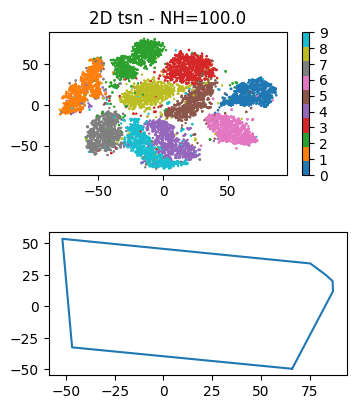

In [79]:
visualization(Xre,y_test, convex_hulls, ellipses ,'tsn', nh=1)

visualization(Xpca,y_test, convex_hulls, ellipses ,'tsn', nh=1)

#Exercice 5 : Visualisation des représentations internes des réseaux de neurones

In [81]:
from keras.models import model_from_yaml
def loadModel(savename):
  with open(savename+".yaml", "r") as yaml_file:
    model = model_from_yaml(yaml_file.read())
  print( "Yaml Model ",savename,".yaml loaded ")
  model.load_weights(savename+".h5")
  print( "Weights ",savename,".h5 loaded ")
  return model

In [82]:
model=loadModel('model2')

Yaml Model  model2 .yaml loaded 
Weights  model2 .h5 loaded 


In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               78500     
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
